In [8]:
import yfinance as yf
import pandas as pd
from datetime import datetime
from arch import arch_model
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
start_date = "2022-08-30"
end_date = "2024-09-30"

In [3]:
exchange_tickers = ["ZAR=X", "AUDUSD=X", "GBPUSD=X"]
exchange_data = {ticker: yf.download(ticker, start=start_date, end=end_date) for ticker in exchange_tickers}

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
for ticker, data in exchange_data.items():
    print(f"Data for {ticker}")
    print(data.head())

Data for ZAR=X
                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2022-08-30  16.809641  16.972799  16.745100  16.809641  16.809641       0
2022-08-31  16.957800  17.087179  16.858629  16.957800  16.957800       0
2022-09-01  17.105209  17.304930  17.088301  17.105209  17.105209       0
2022-09-02  17.251900  17.345699  17.172701  17.251900  17.251900       0
2022-09-05  17.300900  17.418039  17.146500  17.300900  17.300900       0
Data for AUDUSD=X
                Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2022-08-30  0.690751  0.695797  0.685990  0.690751   0.690751       0
2022-08-31  0.685740  0.690422  0.684340  0.685740   0.685740       0
2022-09-01  0.682850  0.684360  0.677172  0.682850   0.682850       0
2022-09-02  0.679530  0.685380  0.678109  0.679530   0.679530       0
2022-09-05  0.679030  0.68041

In [5]:
def calculate_returns(df):
    df['Returns'] = df['Adj Close'].pct_change().dropna() * 100
    return df['Returns'].dropna()

In [6]:
def fit_garch_model(returns, model_type='GARCH'):
    if model_type == 'ARCH':
        model = arch_model(returns, vol='Arch', p=1)
    elif model_type == 'GARCH':
        model = arch_model(returns, vol='Garch', p=1, q=1)
    elif model_type == 'EGARCH':
        model = arch_model(returns, vol='EGarch', p=1, q=1)
    elif model_type == 'TGARCH':
        model = arch_model(returns, vol='Garch', p=1, o=1, q=1)
    else:
        raise ValueError(f"Unsupport model type: {model_type}")
    
    model_fit = model.fit(disp='off')
    return model_fit

In [14]:
def visualize_results(returns, model_results, title):

    # plot returns
    plt.figure(figsize=(20, 10))
    plt.subplot(2, 1, 1)
    plt.plot(returns, label='Returns', color='blue')
    plt.title(f"Daily Returns for {title}", fontsize=20, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Returns')
    plt.legend()

    # plot volatility
    plt.subplot(2, 1, 2)
    plt.plot(model_results.conditional_volatility, label='Conditional Volatility', color='red')
    plt.title(f"Conditional Volatility for {title}", fontsize=20, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [15]:
def evaluate_and_visualiaze(returns, key):
    print(f"\nProcessing {key}...")

    # arch
    print("Fitting ARCH(1) model...")
    arch_res = fit_garch_model(returns, model_type='ARCH')
    print(arch_res.summary())
    visualize_results(returns, arch_res, f"{key} ARCH(1)")

    # garch
    print("Fitting GARCH(1,1) model...")
    garch_res = fit_garch_model(returns, model_type='GARCH')
    print(garch_res.summary())
    visualize_results(returns, garch_res, f"{key} GARCH(1,1)")

    # egarch
    print("Fitting EGARCH(1,1) model...")
    egarch_res = fit_garch_model(returns, model_type='EGARCH')
    print(egarch_res.summary())
    visualize_results(returns, egarch_res, f"{key} EGARCH(1,1)")

    # tgarch
    print("Fitting TGARCH(1,1) model...")
    tgarch_res = fit_garch_model(returns, model_type='TGARCH')
    print(tgarch_res.summary())
    visualize_results(returns, tgarch_res, f"{key} TGARCH(1,1)")

    # compare aic and bic
    print("\nModel Comparisons:")
    print(f"ARCH AIC: {arch_res.aic}, BIC: {arch_res.bic}")
    print(f"GARCH AIC: {garch_res.aic}, BIC: {garch_res.bic}")
    print(f"EGARCH AIC: {egarch_res.aic}, BIC: {egarch_res.bic}")
    print(f"TGARCH AIC: {tgarch_res.aic}, BIC: {tgarch_res.bic}")

    best_bic = min(arch_res.bic, garch_res.bic, egarch_res.bic, tgarch_res.bic)
    if best_bic == arch_res.bic:
        print("\nBest model based on BIC: ARCH")
    elif best_bic == garch_res.bic:
        print("\nBest model based on BIC: GARCH")
    elif best_bic == egarch_res.bic:
        print("\nBest model based on BIC: EGARCH")
    else:
        print("\nBest model based on BIC: TGARCH")


Processing ZAR=X...
Fitting ARCH(1) model...
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -679.737
Distribution:                  Normal   AIC:                           1365.47
Method:            Maximum Likelihood   BIC:                           1378.28
                                        No. Observations:                  528
Date:                Sat, Sep 07 2024   Df Residuals:                      527
Time:                        17:27:01   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu       

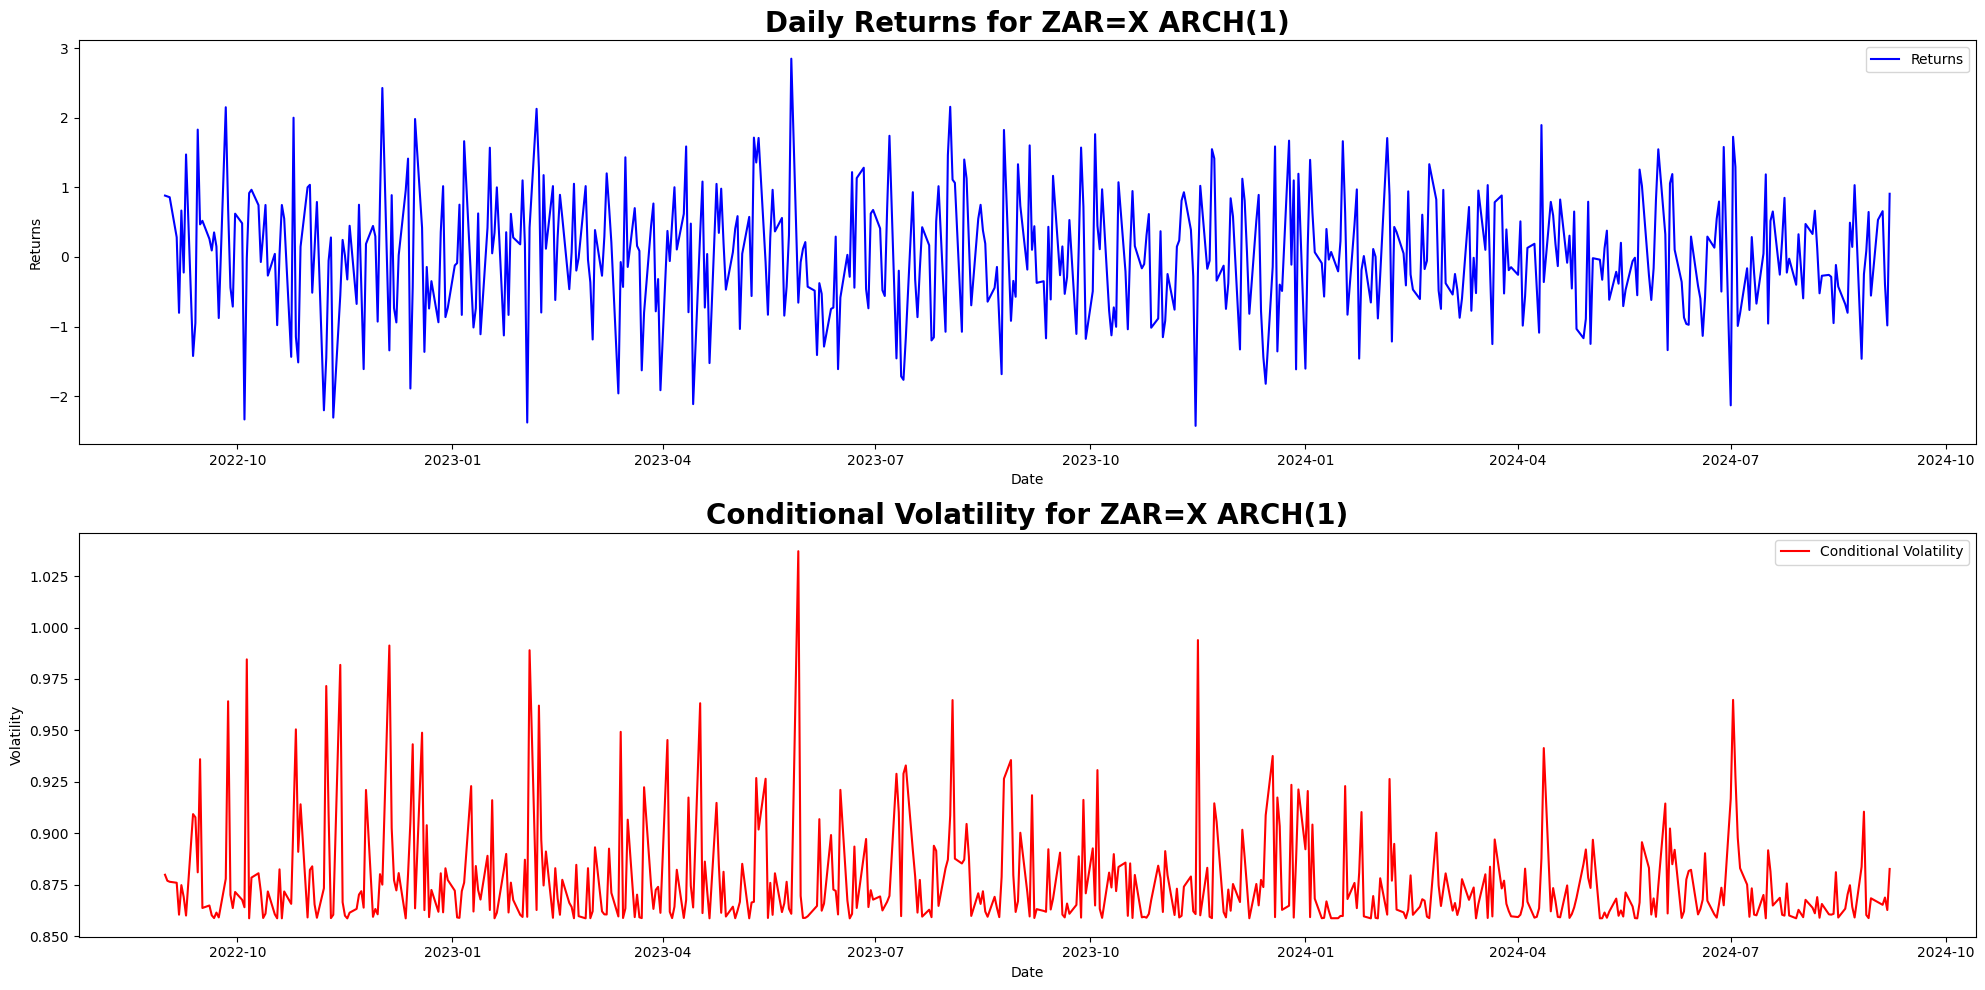

Fitting GARCH(1,1) model...
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -676.275
Distribution:                  Normal   AIC:                           1360.55
Method:            Maximum Likelihood   BIC:                           1377.63
                                        No. Observations:                  528
Date:                Sat, Sep 07 2024   Df Residuals:                      527
Time:                        17:27:01   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0111  3.79

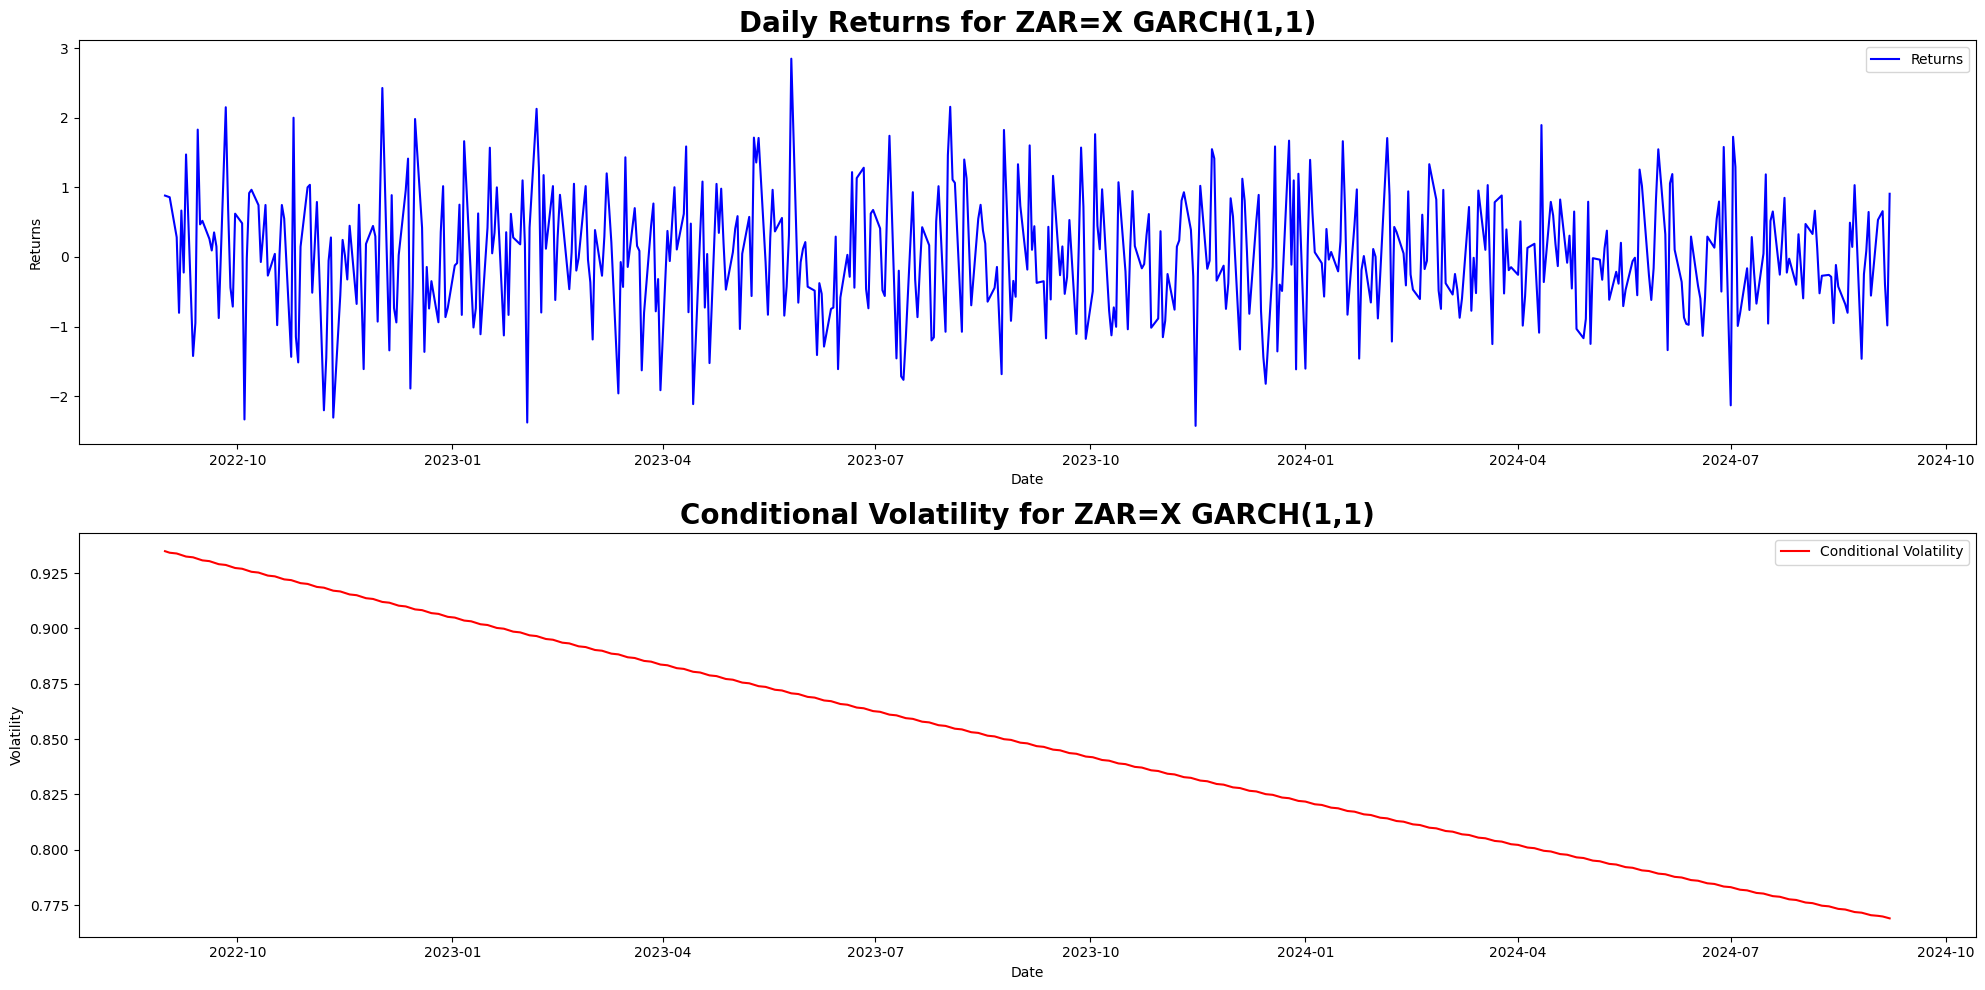

Fitting EGARCH(1,1) model...
                     Constant Mean - EGARCH Model Results                     
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -670.801
Distribution:                  Normal   AIC:                           1349.60
Method:            Maximum Likelihood   BIC:                           1366.68
                                        No. Observations:                  528
Date:                Sat, Sep 07 2024   Df Residuals:                      527
Time:                        17:27:02   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0149  1.210e

c:\Users\Alli Ajagbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


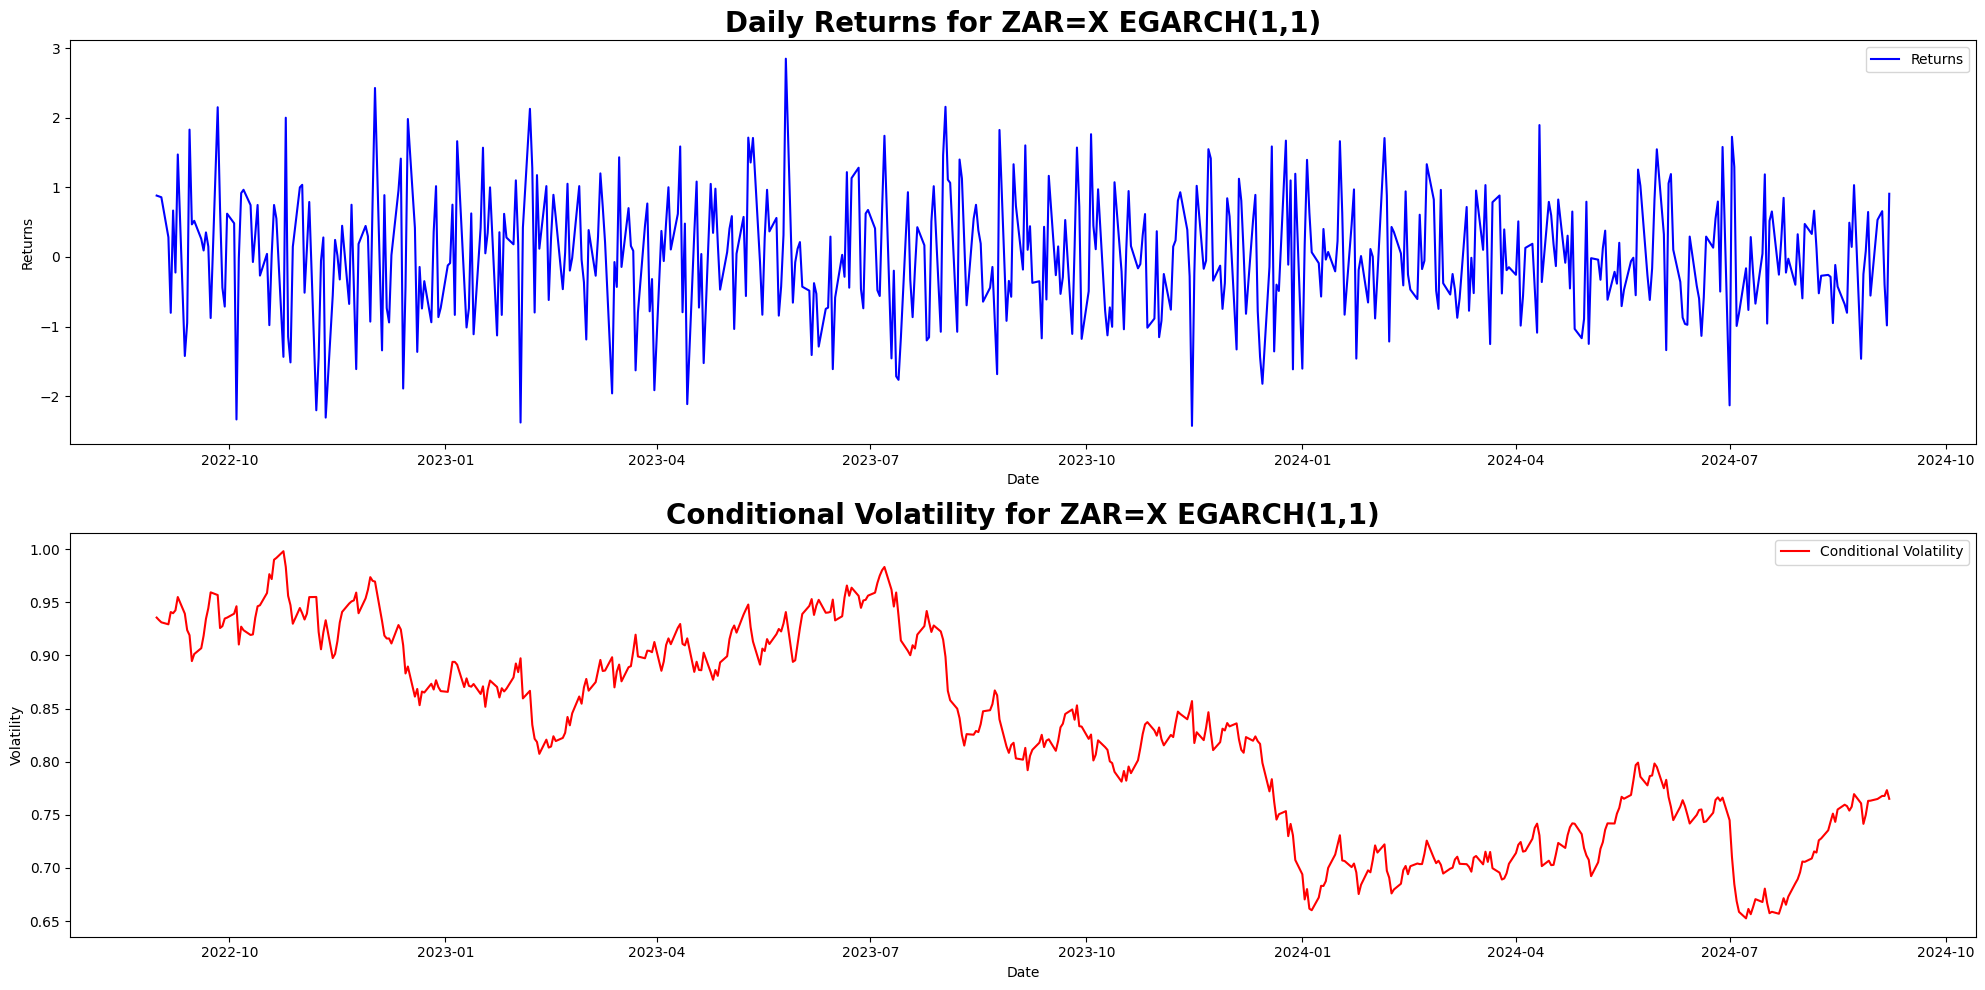

Fitting TGARCH(1,1) model...
                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -676.178
Distribution:                  Normal   AIC:                           1362.36
Method:            Maximum Likelihood   BIC:                           1383.70
                                        No. Observations:                  528
Date:                Sat, Sep 07 2024   Df Residuals:                      527
Time:                        17:27:02   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         6.0180e-03  4.2

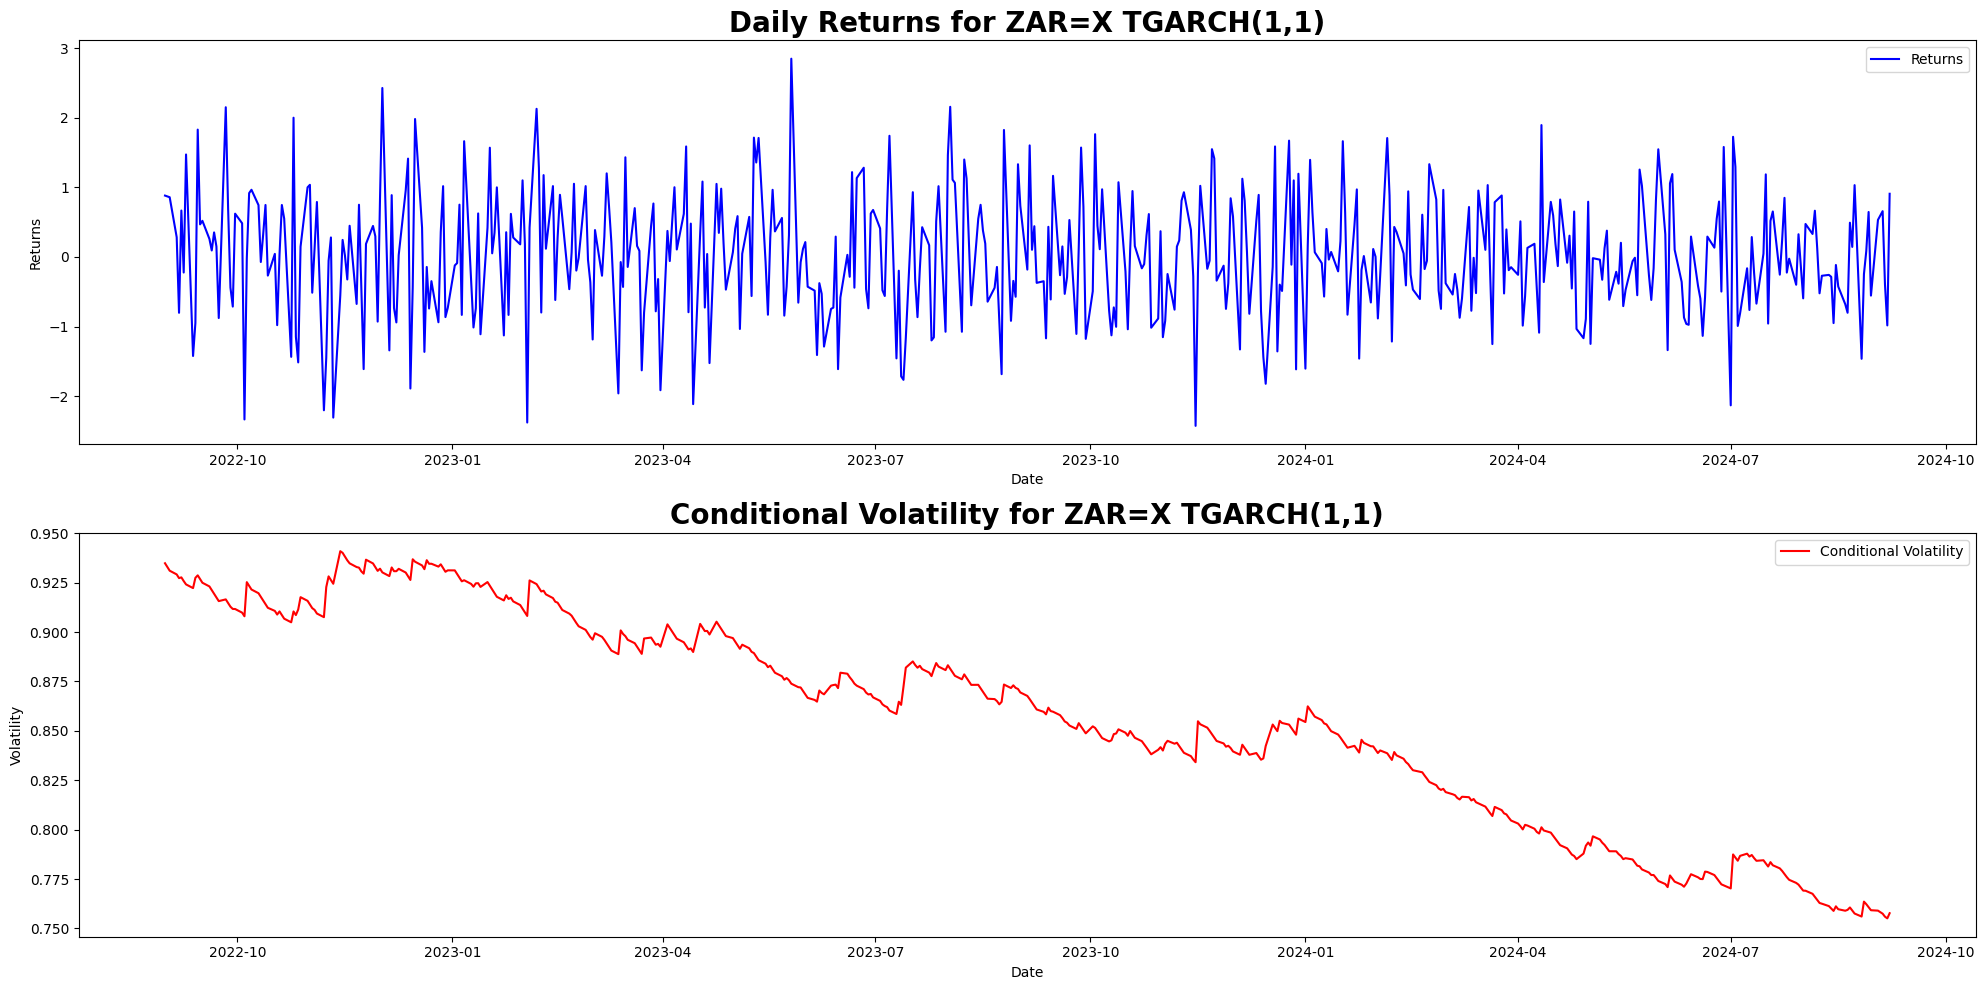


Model Comparisons:
ARCH AIC: 1365.4739414081632, BIC: 1378.281230259282
GARCH AIC: 1360.5508589318451, BIC: 1377.6272440666703
EGARCH AIC: 1349.6025407396355, BIC: 1366.6789258744607
TGARCH AIC: 1362.3556485727302, BIC: 1383.7011299912615

Best model based on BIC: EGARCH

Processing AUDUSD=X...
Fitting ARCH(1) model...
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -542.644
Distribution:                  Normal   AIC:                           1091.29
Method:            Maximum Likelihood   BIC:                           1104.10
                                        No. Observations:                  528
Date:                Sat, Sep 07 2024   Df Residuals:                      527
Time:                        17:27:03   Df Mod

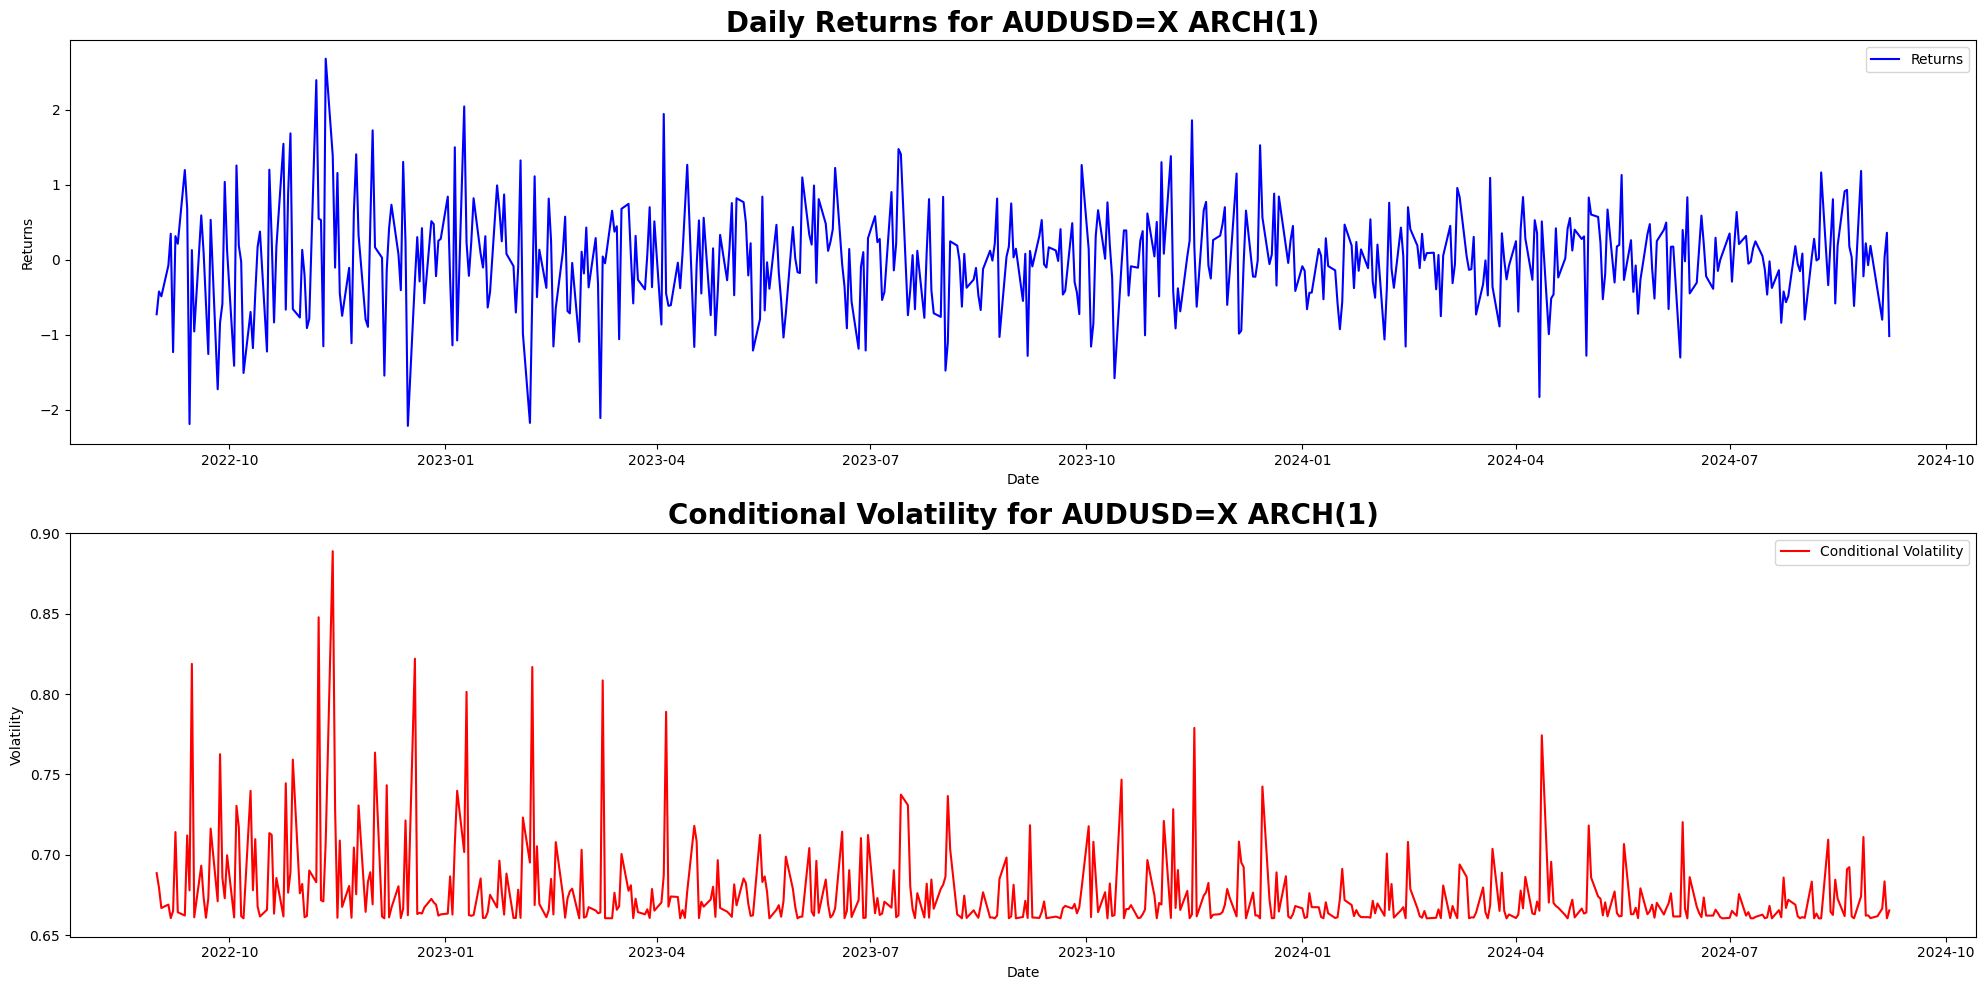

Fitting GARCH(1,1) model...
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -518.640
Distribution:                  Normal   AIC:                           1045.28
Method:            Maximum Likelihood   BIC:                           1062.36
                                        No. Observations:                  528
Date:                Sat, Sep 07 2024   Df Residuals:                      527
Time:                        17:27:04   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         6.1500e-04  2.70

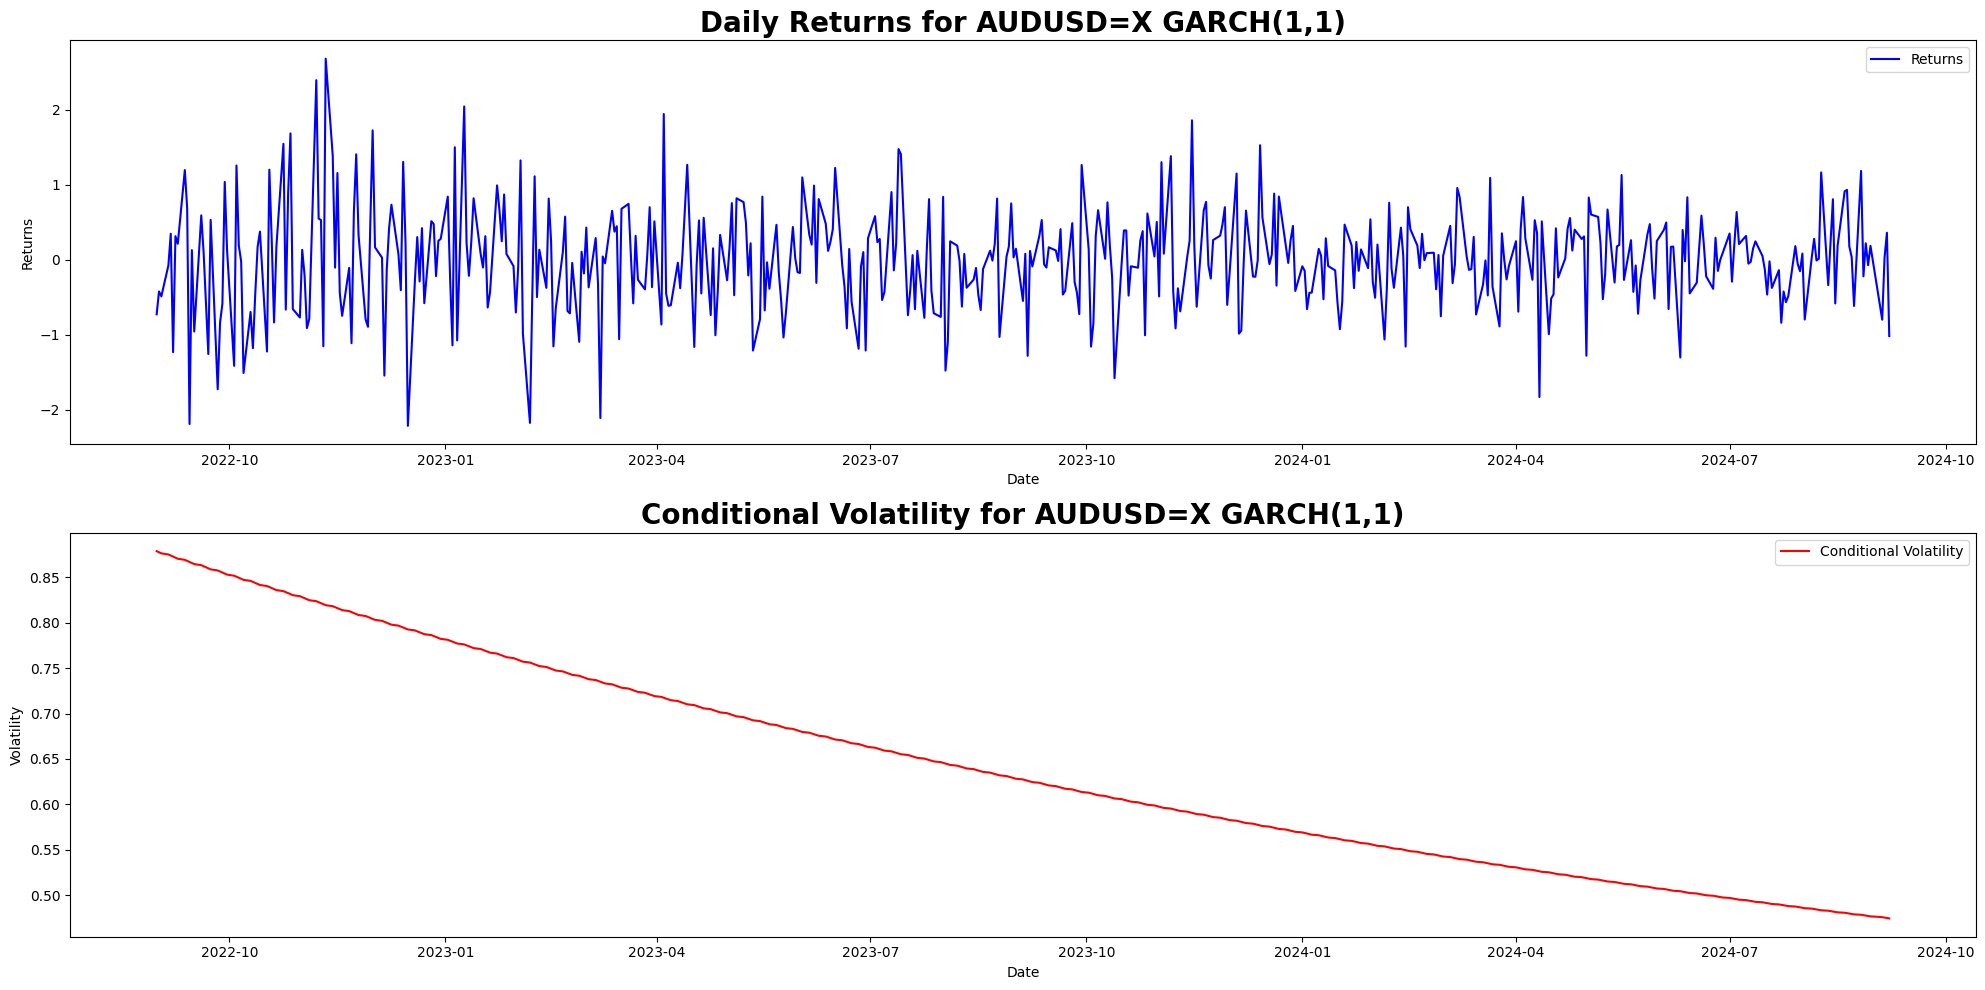

Fitting EGARCH(1,1) model...
                     Constant Mean - EGARCH Model Results                     
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -516.859
Distribution:                  Normal   AIC:                           1041.72
Method:            Maximum Likelihood   BIC:                           1058.79
                                        No. Observations:                  528
Date:                Sat, Sep 07 2024   Df Residuals:                      527
Time:                        17:27:04   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -1.7269e-03 

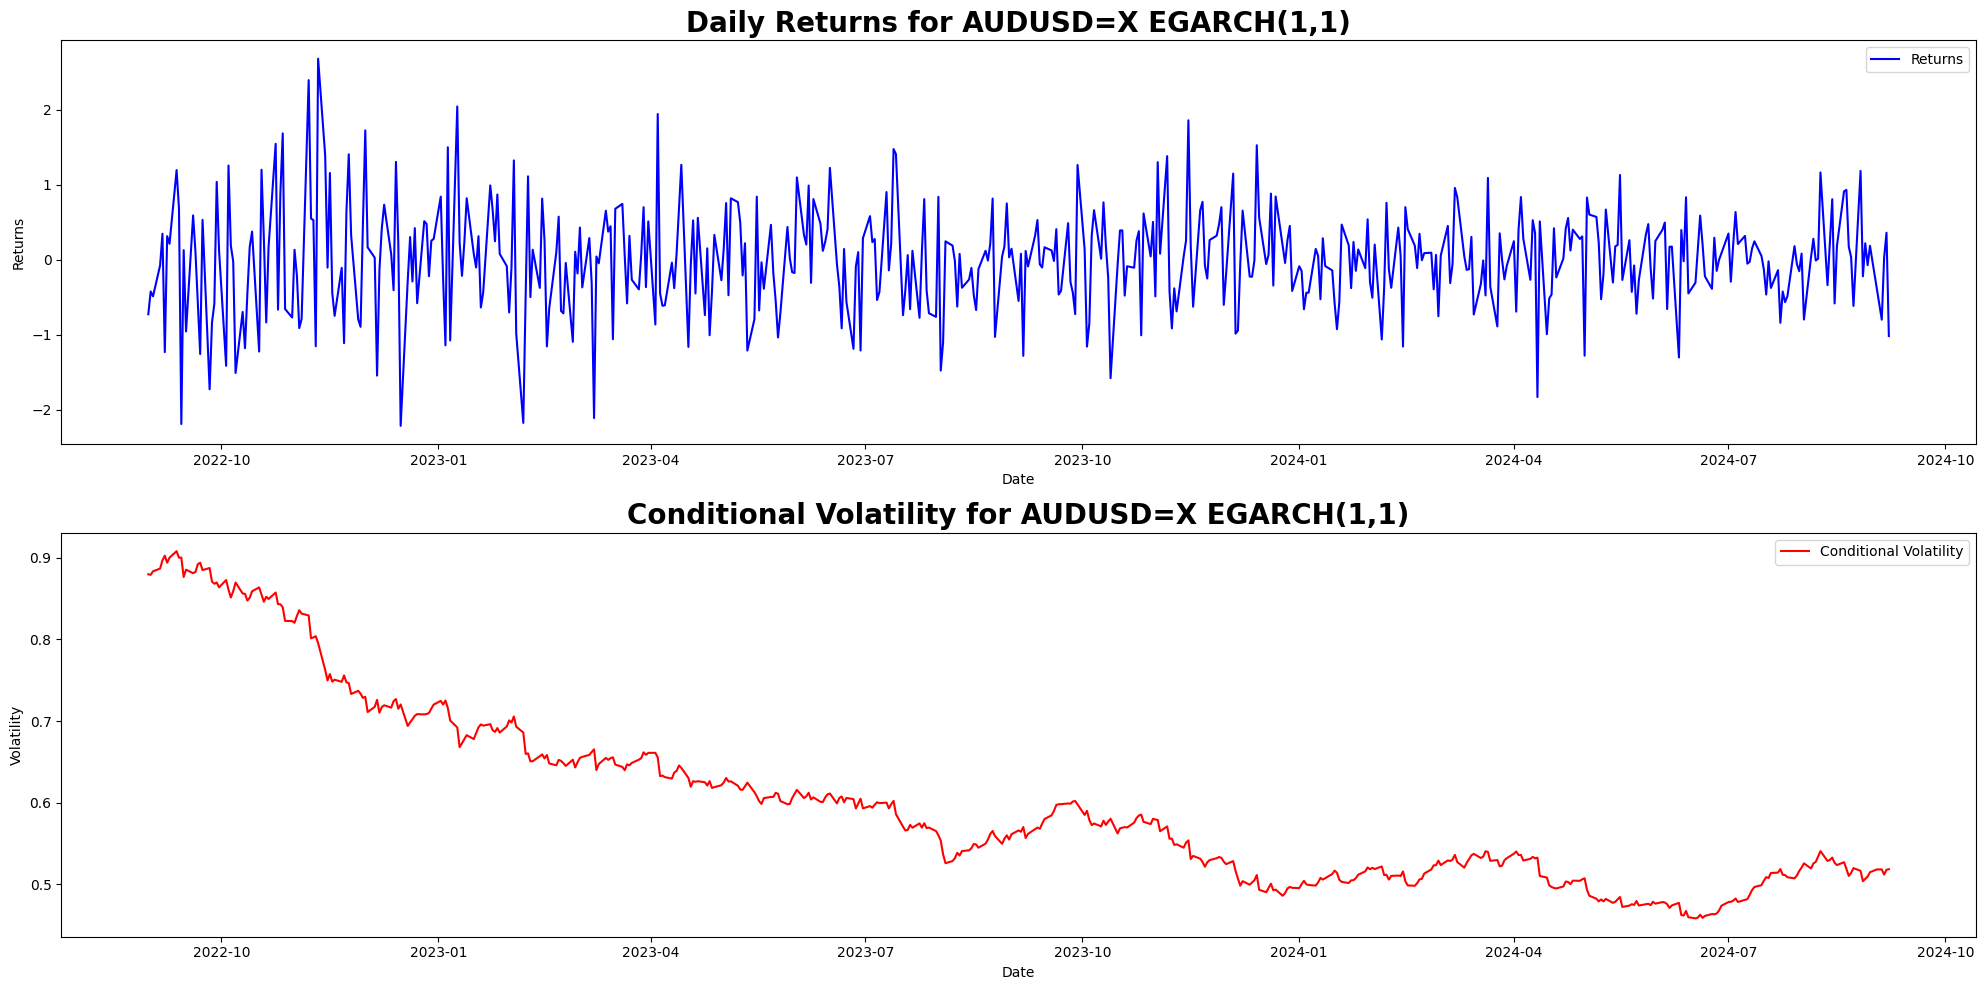

Fitting TGARCH(1,1) model...
                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -518.640
Distribution:                  Normal   AIC:                           1047.28
Method:            Maximum Likelihood   BIC:                           1068.63
                                        No. Observations:                  528
Date:                Sat, Sep 07 2024   Df Residuals:                      527
Time:                        17:27:05   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         6.1404e-04  2.7

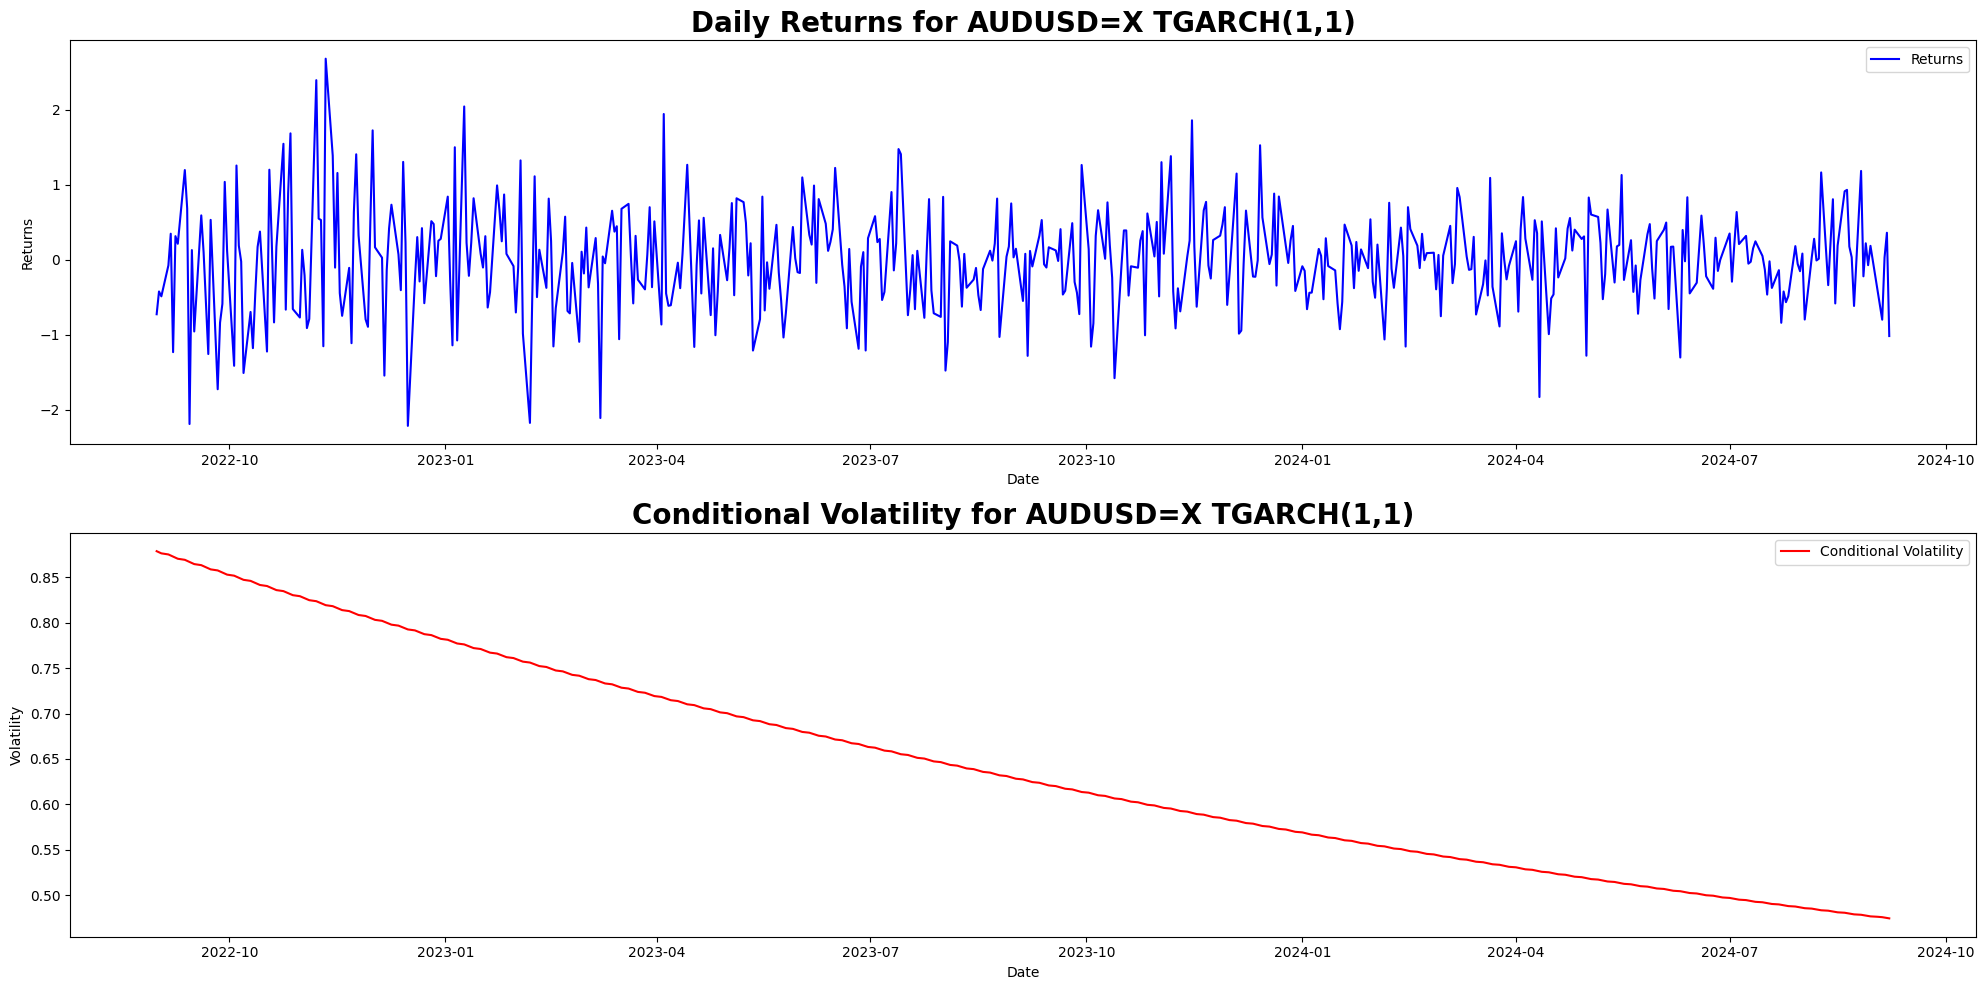


Model Comparisons:
ARCH AIC: 1091.2878891517414, BIC: 1104.0951780028602
GARCH AIC: 1045.2798563631154, BIC: 1062.3562414979406
EGARCH AIC: 1041.7182170275305, BIC: 1058.7946021623557
TGARCH AIC: 1047.2798566243118, BIC: 1068.6253380428432

Best model based on BIC: EGARCH

Processing GBPUSD=X...
Fitting ARCH(1) model...
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -461.819
Distribution:                  Normal   AIC:                           929.639
Method:            Maximum Likelihood   BIC:                           942.446
                                        No. Observations:                  528
Date:                Sat, Sep 07 2024   Df Residuals:                      527
Time:                        17:27:05   Df Mo

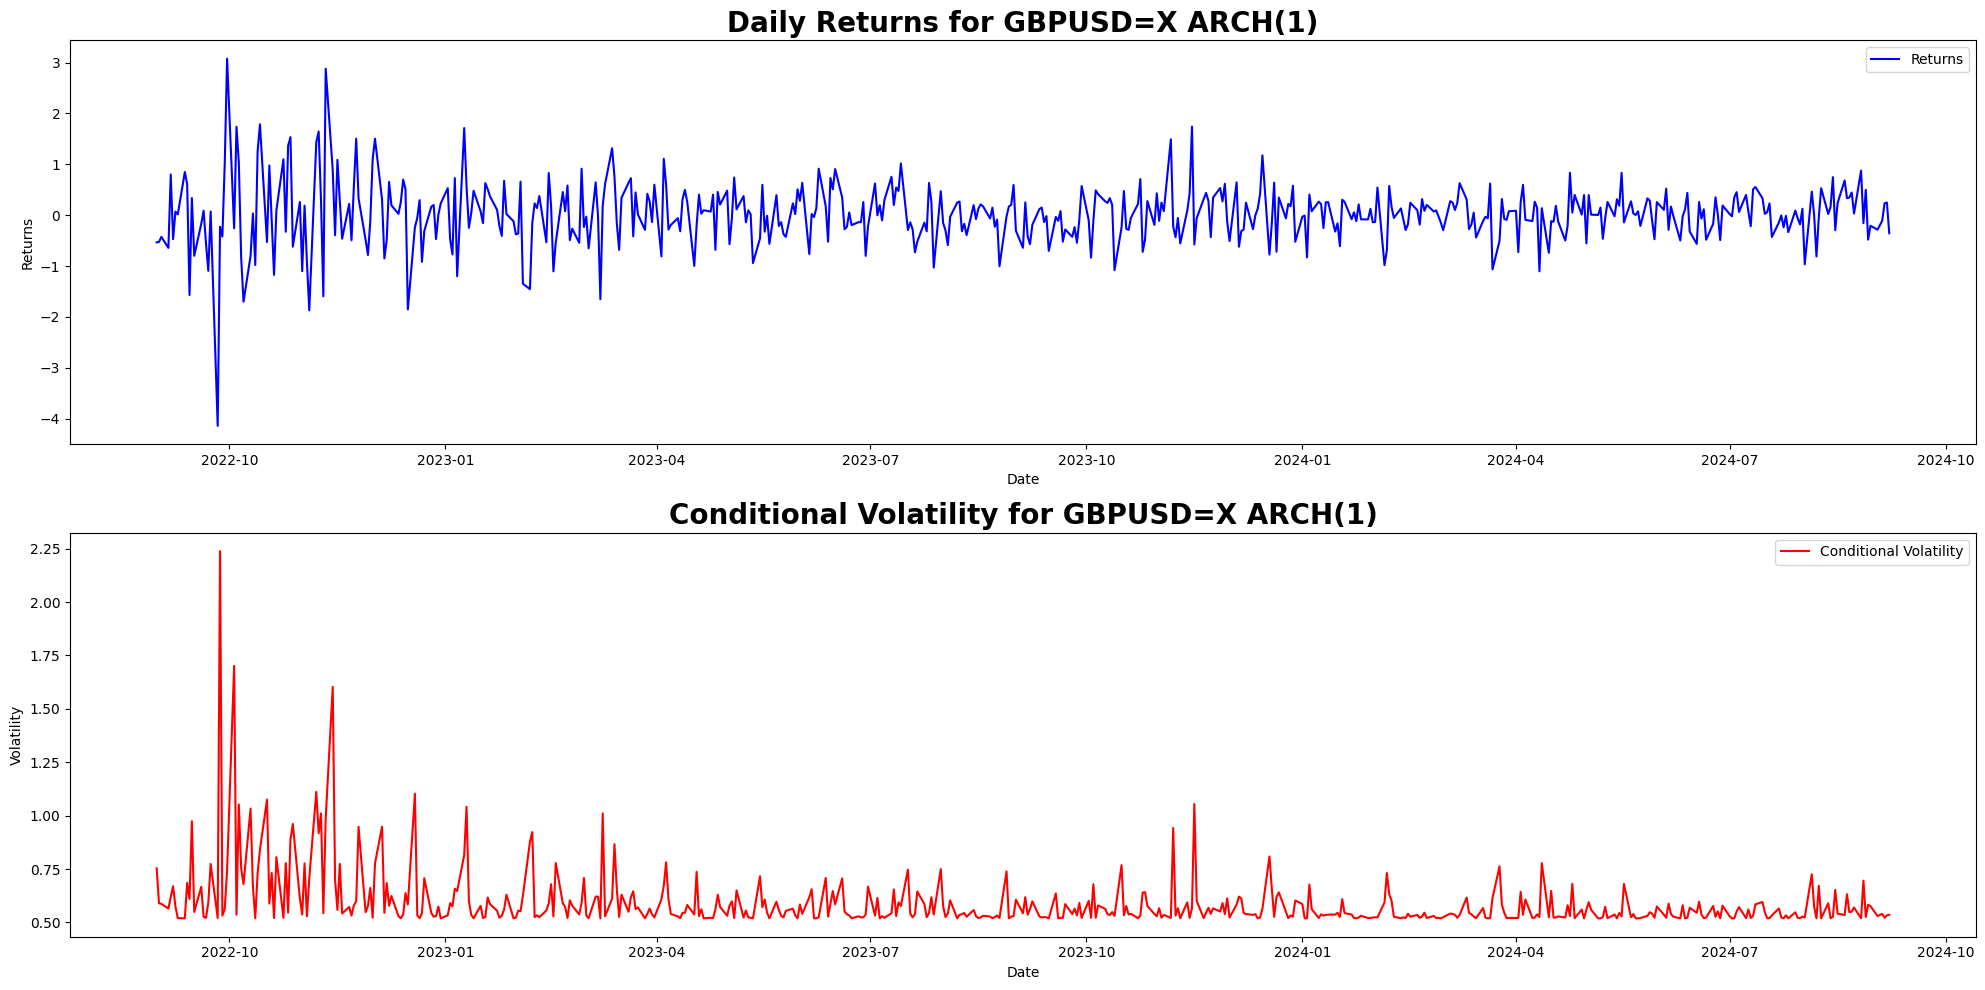

Fitting GARCH(1,1) model...
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -396.226
Distribution:                  Normal   AIC:                           800.452
Method:            Maximum Likelihood   BIC:                           817.528
                                        No. Observations:                  528
Date:                Sat, Sep 07 2024   Df Residuals:                      527
Time:                        17:27:06   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0213  2.03

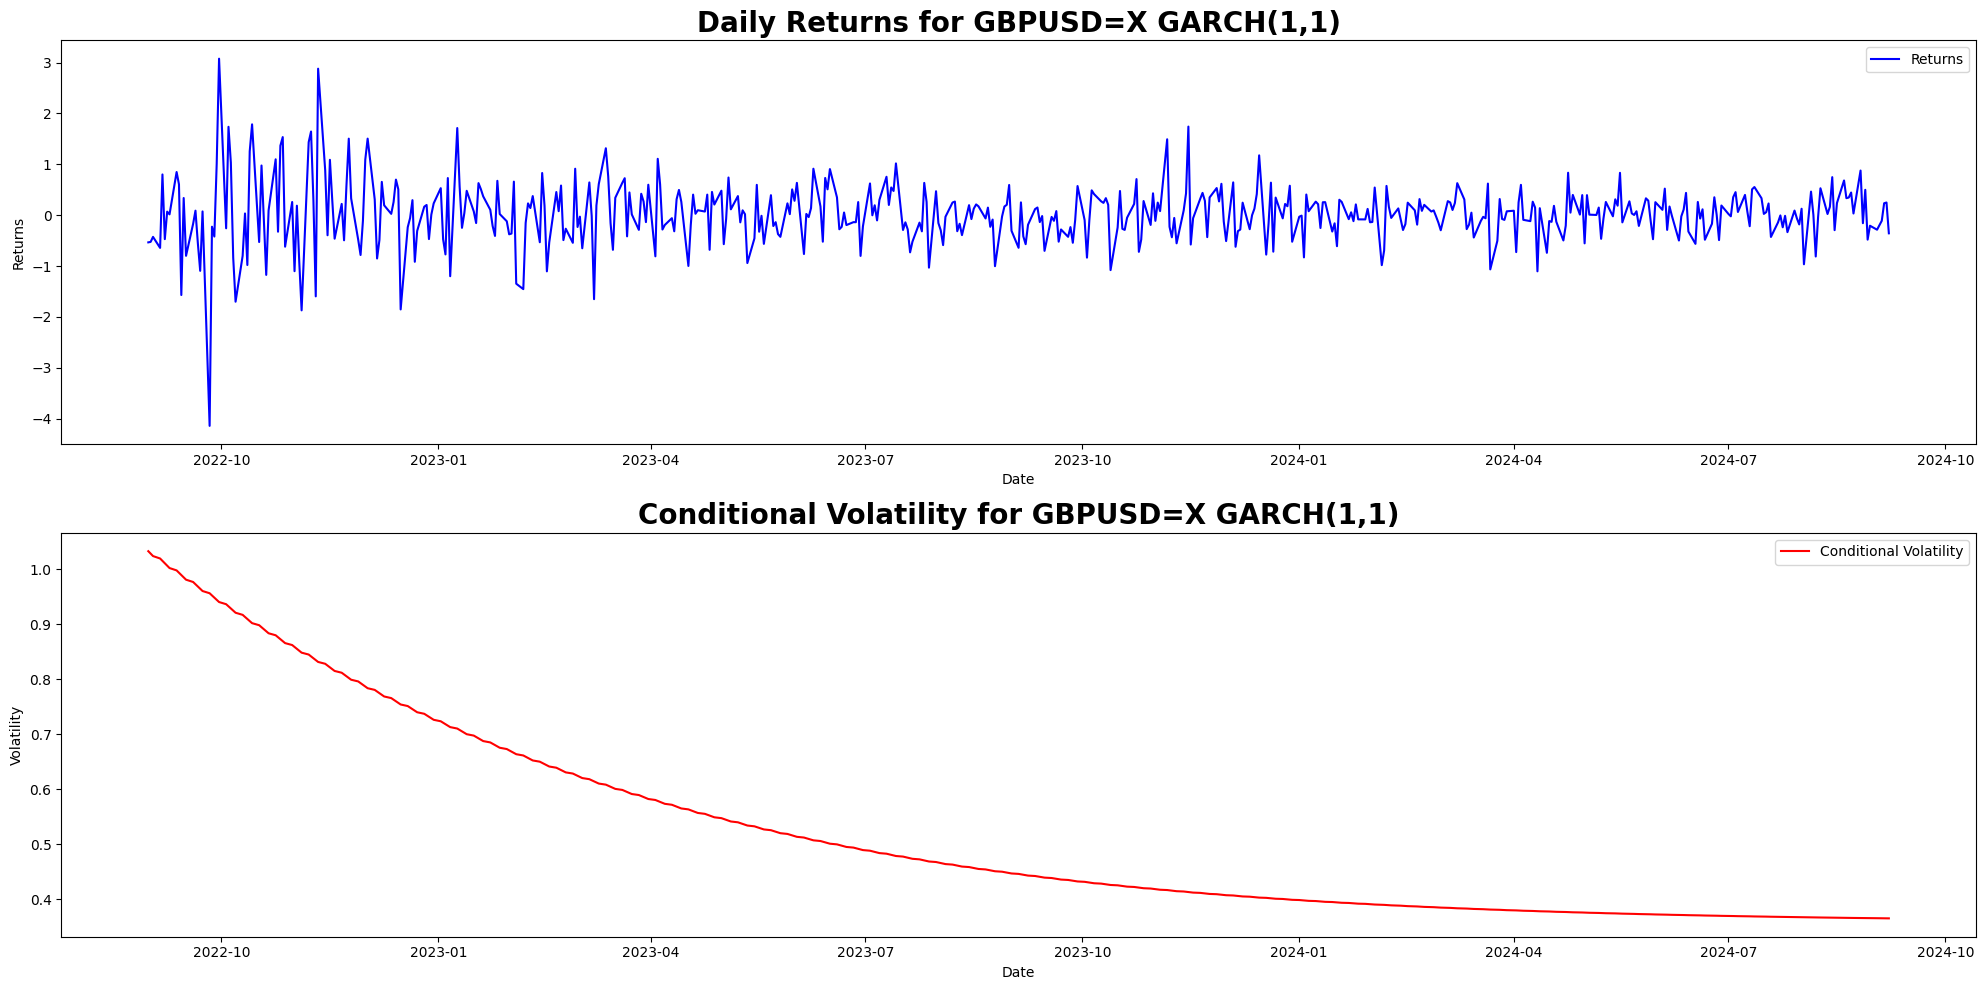

Fitting EGARCH(1,1) model...
                     Constant Mean - EGARCH Model Results                     
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -387.853
Distribution:                  Normal   AIC:                           783.705
Method:            Maximum Likelihood   BIC:                           800.782
                                        No. Observations:                  528
Date:                Sat, Sep 07 2024   Df Residuals:                      527
Time:                        17:27:07   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0124  9.678e

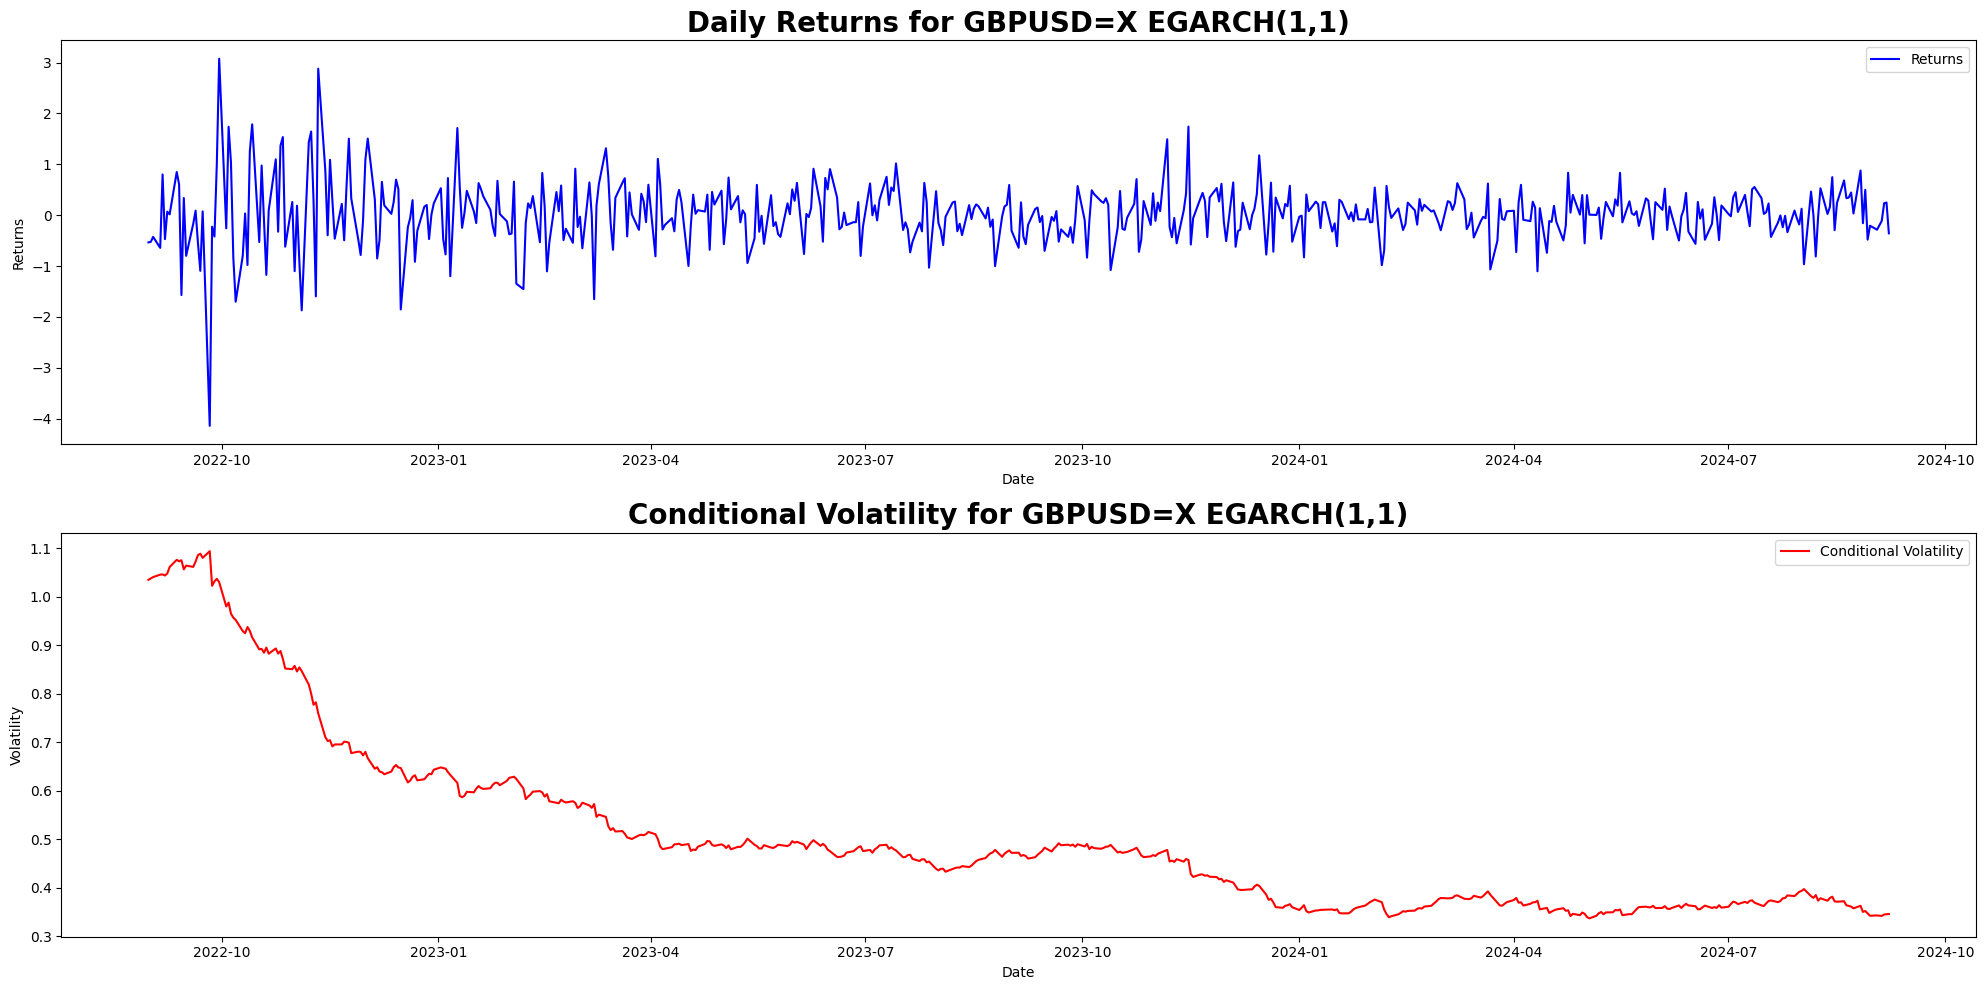

Fitting TGARCH(1,1) model...
                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -395.415
Distribution:                  Normal   AIC:                           800.830
Method:            Maximum Likelihood   BIC:                           822.175
                                        No. Observations:                  528
Date:                Sat, Sep 07 2024   Df Residuals:                      527
Time:                        17:27:07   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0164  2.0

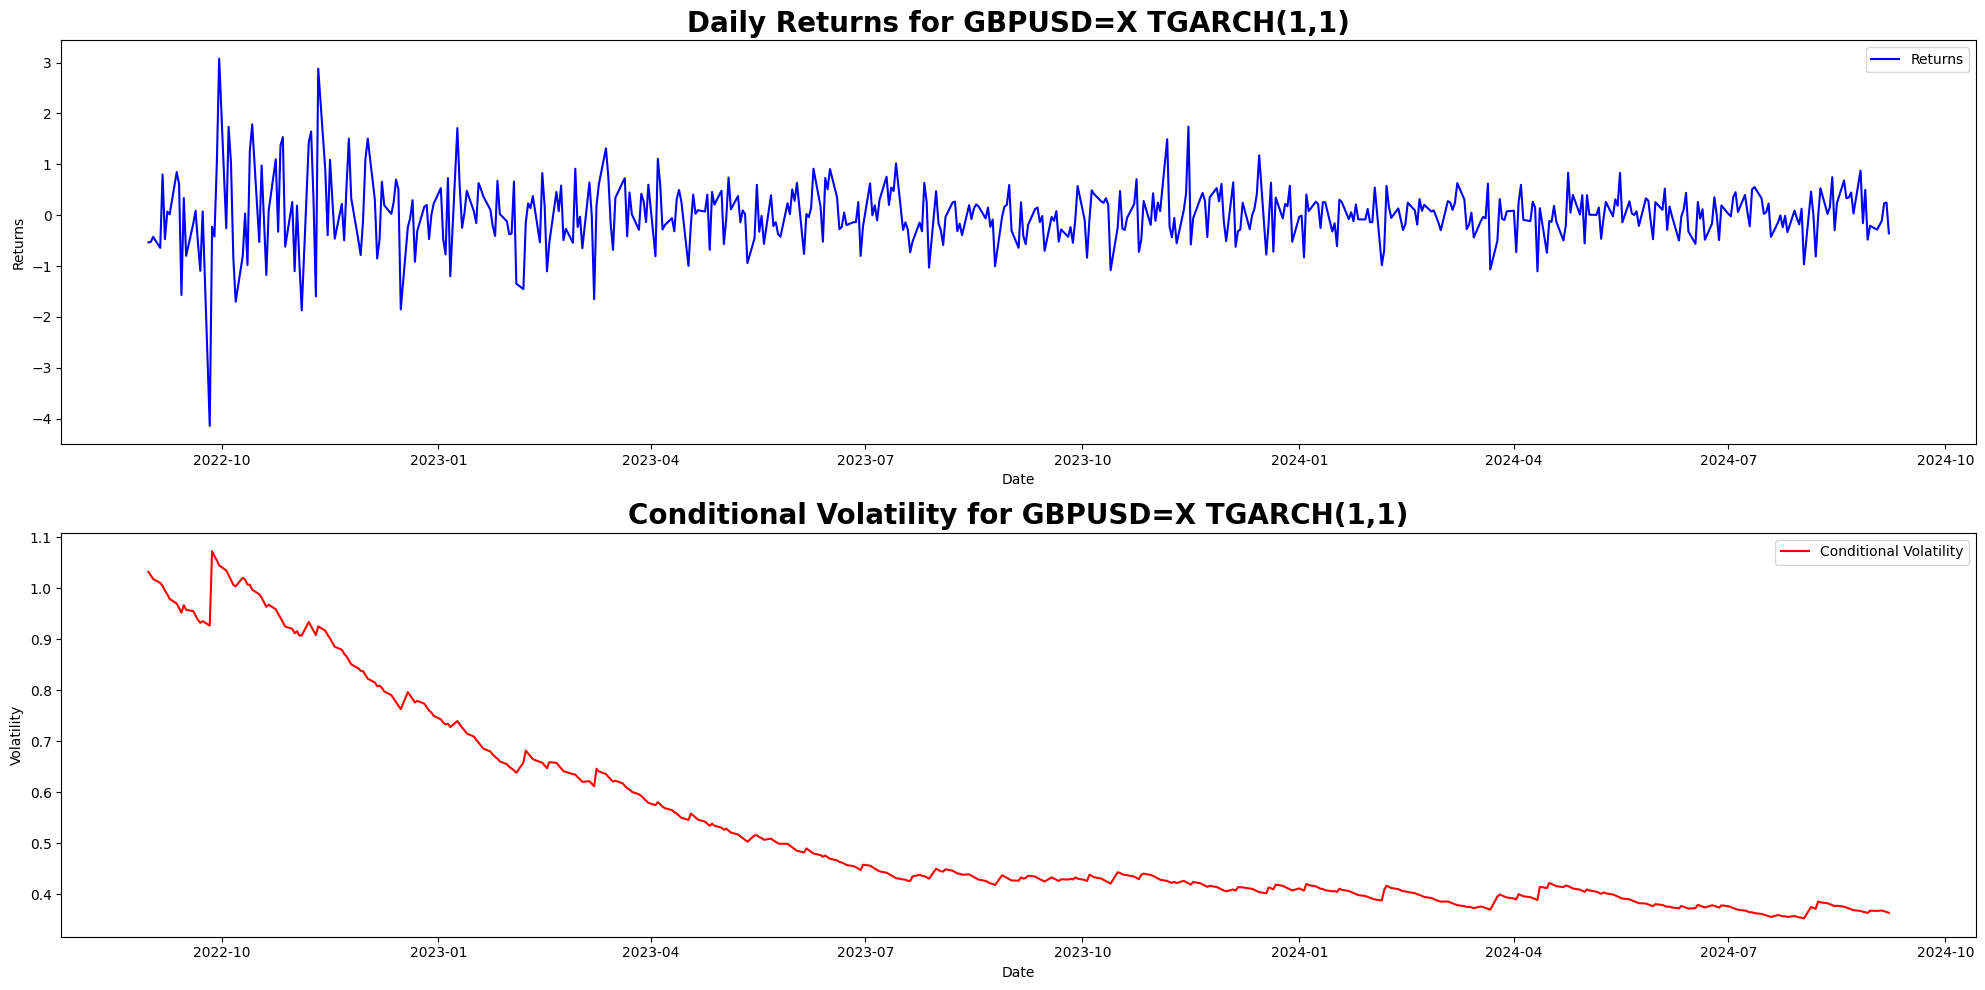


Model Comparisons:
ARCH AIC: 929.63885887227, BIC: 942.4461477233888
GARCH AIC: 800.4518750673487, BIC: 817.5282602021738
EGARCH AIC: 783.7052696374003, BIC: 800.7816547722254
TGARCH AIC: 800.8297879626749, BIC: 822.1752693812062

Best model based on BIC: EGARCH


In [16]:
for key, df in exchange_data.items():
    returns = calculate_returns(df)
    evaluate_and_visualiaze(returns, key)